<a href="https://colab.research.google.com/github/ia4226/Neuro-Fuzzy-casestudy/blob/main/ExtraTree(SCADA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

data definition

In [23]:
data = {
    'windspeed': [6.9, 5.3, 5.0, 4.4, 5.7, 3.9, 3.9, 4.2, 4.1, 4.8],
    'rotation': [0.00, 0.00, 0.00, 0.00, 0.00, 6.75, 6.64, 7.18, 7.02, 8.39],
    'power': [0.00, 0.00, 0.00, 0.00, 0.00, 6.01, 6.33, 6.22, 6.20, 7.14],
    'main_carrier_temp': [0, 0, 0, 0, 0, 147, 128, 163, 160, 284],
    'ambient_temp': [13, 13, 13, 13, 13, 16, 15, 15, 15, 15],
    'tower_temp': [12, 12, 12, 12, 12, 9, 9, 9, 9, 9],
    'control_cabinet_temp': [14, 14, 14, 14, 14, 17, 17, 18, 17, 17],
    'transformer_temp': [24, 24, 24, 24, 23, 27, 27, 27, 27, 27],
    'yaw_inverter_cabinet_temp': [34, 34, 34, 34, 34, 35, 35, 34, 34, 34]
}

data frame

In [24]:
df = pd.DataFrame(data)

In [25]:
X = df.drop(columns=['power'])
y = df['power']

training-testing split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model training

In [27]:
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

Prediction

In [28]:
y_pred = et_model.predict(X_test)

Model Evaluation

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [30]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.02815000000000678
Mean Squared Error: 0.0015848450000007636
Root Mean Squared Error: 0.039810111780812216


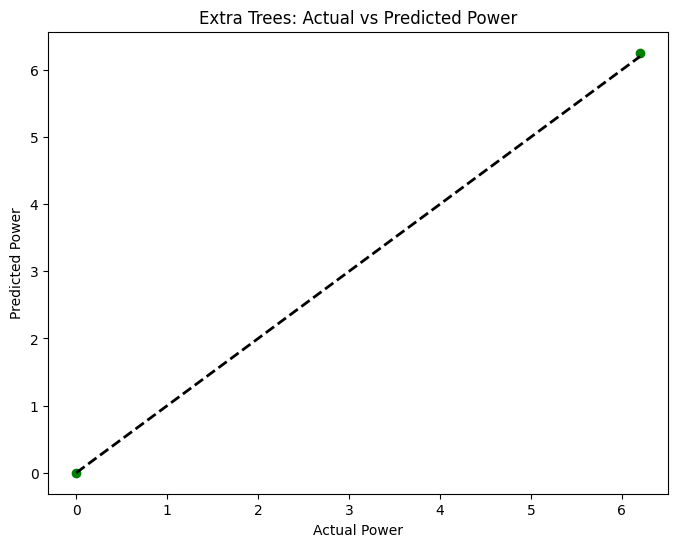

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Extra Trees: Actual vs Predicted Power')
plt.show()